In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import random
from scipy.spatial.distance import pdist

In [2]:
df=pd.read_csv('/Users/heyunyu/Desktop/wd/df_model.csv')
note=pd.read_csv("/Users/heyunyu/Desktop/wd/original/note_data.csv")
req=pd.read_csv("/Users/heyunyu/Desktop/wd/original/investment_requests.csv")
df_full=pd.read_csv("/Users/heyunyu/Desktop/wd/classification.csv")
cluster=pd.read_csv("/Users/heyunyu/Desktop/wd/cluster.csv")

In [3]:
cluster.drop_duplicates(subset=['anon_investor_account_id'],inplace=True)

In [4]:
df=pd.merge(df,cluster[['anon_investor_account_id','cluster']],how='left',on='anon_investor_account_id')
df=df.rename(columns={'cluster':'Groups'})

# data processing

## df:  all request data with corresponding note information

In [5]:
df.columns

Index(['id', 'note_id', 'date_time_invest_req', 'invest_req_amount',
       'invest_confirmed_amt', 'investment_request_status', 'anon_user_id',
       'anon_investor_account_id', 'entity_type', 'offering_launch_date',
       'offering_size', 'minimum_investment_amount',
       'maximum_investment_amount', 'investment_increments', 'investor_yield',
       'term', 'asset_class', 'schedule_type', 'Groups'],
      dtype='object')

## user-id  relabel  (add a new column user-id 0---3392)

In [6]:
label=preprocessing.LabelEncoder()
map_user=dict()
df['user_id']=label.fit_transform(df['anon_investor_account_id'])
## map_user=dict(zip(label.classes_,label.transform(label.classes_)))
map_user=dict(zip(label.transform(label.classes_),label.classes_))

In [7]:
len(map_user)

3098

In [8]:
label_=preprocessing.LabelEncoder()
map_user1=dict()
df_full['user_id']=label_.fit_transform(df_full['anon_investor_account_id'])
## map_user=dict(zip(label.classes_,label.transform(label.classes_)))
map_user1=dict(zip(label_.transform(label_.classes_),label_.classes_))

In [9]:
df_full

,anon_user_id,anon_investor_account_id,is_accredited_investor,wallet_enabled,age,indv_income_200k,indv_net_worth_1m,entt_assets_5m,Groups,user_id
0,7a8b9c6d-19f4-4c3d-8d43-29212a02db16,02cb1a51-d528-4c4e-a380-aad54ceac4e5,False,0,48,False,False,False,1,66
1,9bb1da1b-695d-48a2-a1ed-30a0deabb37a,7340741c-e5af-4948-8290-df19915122b9,False,0,44,False,False,False,1,2522
2,88914a2a-f5e6-4b3e-99c1-dee556cb03f9,267fb8aa-ddb3-4173-a243-da2e2f5fa53b,False,1,42,False,False,False,3,843
3,8c7ed0dc-0627-47a5-8cb5-04aaecd22c75,3d1f4322-626d-4428-833c-c0397e4e92fc,False,1,42,False,False,False,3,1355
4,56325fb8-b364-4268-850a-192598e485e1,e4475013-2fd9-4c11-ae71-87ad85260493,False,0,50,False,False,False,3,4992
5,15dffa00-82cf-46c4-9335-77a1d704576e,2887b236-b93a-42e7-ac09-9f2859682c03,False,1,26,False,False,False,1,885
6,701ba304-682f-4b36-899d-176c490544d1,b576d9cb-a6eb-42e3-a1b8-d4615ede57f6,False,0,55,False,False,False,1,3969
7,852b5089-b97c-459a-94f7-6bcee47d690c,1c340e32-520d-4849-a09c-d7d418d343a6,False,1,37,False,False,False,1,639
8,bebcd6c3-4aa1-4fb2-aa56-d38058669f83,63ec2b4f-f91f-4f44-8fb0-d36094facaed,False,0,61,False,False,False,1,2192
9,5ef083f1-13a0-4a17-a565-2a21b7ed4026,69367754-dff6-4d94-b5f5-b2dd1c064ece,False,1,34,False,False,False,1,2299


## note data

In [10]:
note.head()

,note_id,entity_type,offering_launch_date,offering_size,minimum_investment_amount,maximum_investment_amount,investment_increments,investor_yield,term,yieldstreet_fee,asset_class,asset_subclass,schedule_type,offering_fully_subscribed_dt,new_investors_only,originator_id,asset_class_description,asset_subclass_description
0,1,SPVM,NaN,2250000.0,5000.0,900000,5000.0,32.0,NaN,NaN,COML,RECF,N,NaN,0,NaN,Commercial,Receivables Financing
1,2,SPVM,NaN,2600000.0,5000.0,1040000,5000.0,10.0,NaN,NaN,LEGL,SETL,N,NaN,0,NaN,Legal,Settled Case Funding
2,3,SPVM,NaN,1000000.0,5000.0,400000,5000.0,10.0,NaN,NaN,LEGL,PRST,N,NaN,0,NaN,Legal,Pre-Settlement Finance
3,4,SPVM,NaN,200000.0,5000.0,80000,5000.0,10.0,NaN,NaN,COND,ATHL,N,NaN,0,NaN,Consumer,Professional Athlete Loans
4,5,SPVM,NaN,10250000.0,5000.0,4100000,5000.0,40.0,NaN,NaN,LEGL,PRST,N,NaN,0,NaN,Legal,Pre-Settlement Finance


In [11]:
# df1=df[df['note_id']!=3074]
# df2=df[df['note_id']!=3075]

## payment type: one hot encoding

In [12]:
pay=preprocessing.LabelEncoder()
map_pay=dict()
copy=pay.fit_transform(df['schedule_type'])
map_pay=dict(zip(pay.classes_,pay.transform(pay.classes_)))

In [13]:
pay_=preprocessing.OneHotEncoder(sparse=False).fit_transform(copy.reshape(-1,1))

In [14]:
map_pay

{'I': 0, 'N': 1, 'P': 2}

In [15]:
payment=pd.DataFrame(pay_)
payment.columns=['is_I','is_N','is_P']
payment.head()

,is_I,is_N,is_P
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


## Asset class: One hot encoding

In [16]:
cl=preprocessing.LabelEncoder()
map_cl=dict()
copy_cl=cl.fit_transform(df['asset_class'])
map_cl=dict(zip(cl.classes_,cl.transform(cl.classes_)))
cl_=preprocessing.OneHotEncoder(sparse=False).fit_transform(copy_cl.reshape(-1,1))
asset=pd.DataFrame(cl_)
asset.columns=['is_com','is_con','is_legal','is_marin','is_real']
asset.head()

,is_com,is_con,is_legal,is_marin,is_real
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [17]:
map_cl

{'COML': 0, 'COND': 1, 'LEGL': 2, 'MRIN': 3, 'REAL': 4}

In [18]:
df.shape

(15635, 20)

## also for entity type

In [19]:
entity=preprocessing.LabelEncoder()
map_entity=dict()
copy_entity=entity.fit_transform(df['entity_type'])
map_entity=dict(zip(entity.classes_,entity.transform(entity.classes_)))
entity_=preprocessing.OneHotEncoder(sparse=False).fit_transform(copy_entity.reshape(-1,1))

entity_type=pd.DataFrame(entity_)
entity_type.columns=['is_BPDN','is_SPVM']
entity_type.head()
len(entity_type)

15635

In [20]:
map_entity

{'BPDN': 0, 'SPVM': 1}

## payment type and asset class varibales concat with df

In [21]:
df=pd.concat([df,payment],axis=1)
df=pd.concat([df,asset],axis=1)
df=pd.concat([df,entity_type],axis=1)

In [22]:
df=pd.concat([df,req[['investment_request_waitlisted','investment_request_confirmed']]],axis=1)

In [23]:
df.isnull().sum()

id                                  0
note_id                             0
date_time_invest_req                0
invest_req_amount                   0
invest_confirmed_amt              175
investment_request_status           0
anon_user_id                        0
anon_investor_account_id            0
entity_type                         0
offering_launch_date               26
offering_size                       0
minimum_investment_amount           0
maximum_investment_amount           0
investment_increments               0
investor_yield                      0
term                                0
asset_class                         0
schedule_type                       0
Groups                           4323
user_id                             0
is_I                                0
is_N                                0
is_P                                0
is_com                              0
is_con                              0
is_legal                            0
is_marin    

## find all categorical columns

In [24]:
cat=[]
con=[]
for v in df.columns:
    if len(df[v].value_counts().index)<=15:
        cat.append(v)
#     else:
#         con.append(v)

In [25]:
pd.unique(note['investment_increments'])

array([5.0000e+03, 1.0000e+03, 1.0000e+05, 1.0000e+00, 1.0000e-02,
       1.0000e+04, 5.0000e+04, 3.0000e+04, 1.1111e+04, 0.0000e+00,
       5.0000e+06, 1.0715e+06])

In [26]:
con=['invest_req_amount',
 'invest_confirmed_amt',
 'offering_size',
 'minimum_investment_amount',
 'maximum_investment_amount',
 'investor_yield',
 'term']

In [27]:
# for element in cat:
#     print(element,pd.unique(df[element]))
#     print(df[element].value_counts())

In [28]:
# n_cols = 4
# n_rows = 4
# sns.set(style="darkgrid")
# for i in range(n_rows):
#     fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(18, 6))
#     for j in range(n_cols):
#         sns.countplot(x=cat[i*n_cols+j], data=df, ax=ax[j])

In [29]:
# n_cols=4
# n_rows=2

# for i in range(n_rows):
#     fig,ax=plt.subplots(nrows=1,ncols=n_cols,figsize=(18,8))
#     for j in range(n_cols):
#         sns.violinplot(y=con[i*n_cols+j],data=df,ax=ax[j])

In [30]:
# def plot_corr(df,size=15):
#     corr=df.corr()
#     fig,ax=plt.subplots(figsize=(size,size))
#     cax=ax.matshow(corr,cmap=plt.get_cmap("rainbow"))
#     plt.xticks(range(len(corr.columns)),corr.columns)
#     #plt.xticks(df_train.columns) plt.xticks?
#     plt.yticks(range(len(corr.columns)),corr.columns)
#     plt.colorbar(cax) ## legend
# plot_corr(df=d28)


# modeling

## select two notes as new offering
note_id=3057/3067

### first note with id 3057

In [31]:
new1=df[df['note_id']==3057][['note_id','offering_size', 'minimum_investment_amount','maximum_investment_amount', 'investment_increments',
                   'investor_yield','term', 'is_I', 'is_N', 'is_P','is_BPDN','is_SPVM']].drop_duplicates()
df[df['note_id']==3057].asset_class.value_counts().index

Index(['LEGL'], dtype='object')

In [32]:
new1

,note_id,offering_size,minimum_investment_amount,maximum_investment_amount,investment_increments,investor_yield,term,is_I,is_N,is_P,is_BPDN,is_SPVM
6023,3057,4900000.0,20000.0,2000000.0,5000.0,13.0,48.0,0.0,1.0,0.0,0.0,1.0


### second note with id 3067

In [33]:
new2=df[df['note_id']==3067][['note_id','offering_size', 'minimum_investment_amount','maximum_investment_amount', 'investment_increments',
                   'investor_yield','term', 'is_I', 'is_N', 'is_P','is_BPDN','is_SPVM']].drop_duplicates()
df[df['note_id']==3067].asset_class.value_counts().index

Index(['REAL'], dtype='object')

In [34]:
new2

,note_id,offering_size,minimum_investment_amount,maximum_investment_amount,investment_increments,investor_yield,term,is_I,is_N,is_P,is_BPDN,is_SPVM
6821,3067,9054800.0,24800.0,1000000.0,5000.0,10.25,36.0,1.0,0.0,0.0,0.0,1.0


## function definition
using M distance instead of pearson correlation to get similarity

The M distance between two points is independent of the measurement unit of original data.  M distance also eliminates the effects of correlation between variables. 


M distance calculation is established on the basis of the overall sample, because of the covariance matrix,  for example, if the same two samples, in the two different population, finally calculated the M distance between two samples is often not the same, unless the two covariance matrix happened to be the same.

In the process of calculating Mdistance, it is required that the total sample number is greater than the dimension of the sample, otherwise the obtained population sample covariance matrix inverse matrix does not exist. 

due to the two reasons, we combine user history with the wholde note dataset together to calculate M distance

In [35]:
df.columns

Index(['id', 'note_id', 'date_time_invest_req', 'invest_req_amount',
       'invest_confirmed_amt', 'investment_request_status', 'anon_user_id',
       'anon_investor_account_id', 'entity_type', 'offering_launch_date',
       'offering_size', 'minimum_investment_amount',
       'maximum_investment_amount', 'investment_increments', 'investor_yield',
       'term', 'asset_class', 'schedule_type', 'Groups', 'user_id', 'is_I',
       'is_N', 'is_P', 'is_com', 'is_con', 'is_legal', 'is_marin', 'is_real',
       'is_BPDN', 'is_SPVM', 'investment_request_waitlisted',
       'investment_request_confirmed'],
      dtype='object')

In [36]:
## get individual history
def get_df(df,user_id,asset_class):
    d=df[df['user_id']==user_id]
    d=d[d['asset_class']==asset_class]
    return d

## get mahalanobis distance between offerings  
def get_dist(df,d,new_note):
    df=df[['note_id','offering_size', 'minimum_investment_amount','maximum_investment_amount', 'investment_increments',
                       'investor_yield','term', 'is_I', 'is_N', 'is_P','is_BPDN','is_SPVM']]
    d_=d[['note_id','offering_size', 'minimum_investment_amount','maximum_investment_amount', 'investment_increments',
                       'investor_yield','term', 'is_I', 'is_N', 'is_P','is_BPDN','is_SPVM']]
    note=pd.concat([new_note,d_,df],axis=0).drop_duplicates(['note_id']).set_index('note_id')
    dist=pdist(note,'mahalanobis')
    d_=d_.drop_duplicates(['note_id'])
    dist_user=pd.DataFrame(dist).iloc[:d_.shape[0],:]
    range1=dist.max()
    range0=dist.min()
    return dist_user,range1,range0
 
## get predicted request amount
def req_amount(d,dist_user):
    amount=0
    cum=0
    if dist_user.shape[0]>=3: 
        dist_user=dist_user.apply(norm_)
        d=d.drop_duplicates(['note_id'])
        for i in (range(len(dist_user))):
            index=d[['note_id']].iloc[i,:]
            sim=1-dist_user.iloc[i,:]
            invest=d[d['note_id']==int(index)]['invest_confirmed_amt'].values.sum()
            new_invest=invest*sim
            amount+=new_invest
            cum+=sim
        amount=amount/cum
        return amount
    elif d.shape[0]==0:
        return(0)
    else:
        print("Error: Data is too little!")

In [37]:
## get group history
def get_df_group(df_full,df,user_id,asset_class):
    label=df_full['Groups'][df_full['user_id']==user_id].reset_index().iloc[0,1]
    d=df[df['Groups']==label]
    d=d[d['asset_class']==asset_class]
    return d

## normalize distance

In [38]:
r1=14.59114254661032
r0=0.00
def norm_(x):
    return ((x-r0)/(r1-r0))

## d (user history): is generated by function, contains all history of one specified asset class (e.g. Legal) from one specified user

In [39]:
## for user with user_id=1890 and asset_class is legal
d=get_df(df,user_id=1890,asset_class='LEGL')
d

,id,note_id,date_time_invest_req,invest_req_amount,invest_confirmed_amt,investment_request_status,anon_user_id,anon_investor_account_id,entity_type,offering_launch_date,...,is_P,is_com,is_con,is_legal,is_marin,is_real,is_BPDN,is_SPVM,investment_request_waitlisted,investment_request_confirmed
5918,5981,3053,2017-12-12 20:13:58,250000.0,250000.0,ACTV,a9ace1f8-6dc9-4a07-87c6-cd4a38f06767,a0c771c1-6391-46b0-838f-574053f7f2b0,SPVM,2017-12-13,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
6416,6479,3056,2018-01-22 23:00:25,150000.0,150000.0,ACTV,a9ace1f8-6dc9-4a07-87c6-cd4a38f06767,a0c771c1-6391-46b0-838f-574053f7f2b0,SPVM,2018-01-22,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1
11596,12618,3082,2018-08-17 22:00:04,200000.0,200000.0,ACTV,a9ace1f8-6dc9-4a07-87c6-cd4a38f06767,a0c771c1-6391-46b0-838f-574053f7f2b0,SPVM,2018-08-17,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1


## note: concat new note, user history and all note data together
because we want to compute the M(mahalanobis) distance for each pair of note, we get a whole data combining previous data together and drop duplicates rows

In [40]:
df_=df[['note_id','offering_size', 'minimum_investment_amount','maximum_investment_amount', 'investment_increments',
                       'investor_yield','term', 'is_I', 'is_N', 'is_P','is_BPDN','is_SPVM']]
d_=d[['note_id','offering_size', 'minimum_investment_amount','maximum_investment_amount', 'investment_increments',
                       'investor_yield','term', 'is_I', 'is_N', 'is_P','is_BPDN','is_SPVM']]
note=pd.concat([new1,d_,df_],axis=0).drop_duplicates(['note_id']).set_index('note_id')
note

,offering_size,minimum_investment_amount,maximum_investment_amount,investment_increments,investor_yield,term,is_I,is_N,is_P,is_BPDN,is_SPVM
note_id,,,,,,,,,,,
3057,4900000.00,20000.0,2000000.0,5000.00,13.000000,48.0,0.0,1.0,0.0,0.0,1.0
3053,18500000.00,55000.0,1000000.0,5000.00,10.250000,36.0,1.0,0.0,0.0,0.0,1.0
3056,5050000.00,20000.0,2000000.0,0.01,13.000000,48.0,0.0,1.0,0.0,0.0,1.0
3082,6445000.00,25000.0,250000.0,0.01,13.000000,48.0,0.0,1.0,0.0,0.0,1.0
1625,4045000.00,5000.0,4100000.0,5000.00,40.000000,36.0,0.0,1.0,0.0,0.0,1.0
2508,600000.00,5000.0,240000.0,5000.00,13.000000,36.0,0.0,1.0,0.0,0.0,1.0
2558,600000.00,5000.0,240000.0,5000.00,13.000000,29.0,0.0,0.0,1.0,0.0,1.0
2509,700000.00,5000.0,280000.0,5000.00,13.000000,36.0,0.0,1.0,0.0,0.0,1.0
1720,270300.00,5000.0,270300.0,5000.00,20.000000,18.0,0.0,1.0,0.0,0.0,1.0


## distribution of all note normalized distance

In [41]:
notes=df[['note_id','offering_size', 'minimum_investment_amount','maximum_investment_amount', 'investment_increments',
                       'investor_yield','term', 'is_I', 'is_N', 'is_P','is_BPDN','is_SPVM']].drop_duplicates(['note_id']).set_index('note_id')
dist=pd.DataFrame(pdist(notes,'mahalanobis'))

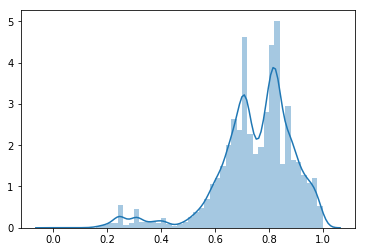

In [42]:
#sns.set()
dd=1-dist.apply(norm_)
sns.distplot(dd)

## Examples
using the previously selected two notes and pick two users (user_id=1000/1890)

### for investors with investment history

In [43]:
d=get_df(df,user_id=1000,asset_class='LEGL')
u,r1,r0=get_dist(df,d,new1)
req_amount(d,u)

Error: Data is too little!


In [44]:
d=get_df(df,user_id=1890,asset_class='LEGL')
u,r1,r0=get_dist(df,d,new2)
req_amount(d,u)

0    200057.908704
Name: 0, dtype: float64

In [45]:
d=get_df(df,user_id=1000,asset_class='REAL')
u,r1,r0=get_dist(df,d,new1)
req_amount(d,u)

0

In [46]:
d=get_df(df,1890,'REAL')
u,r1,r0=get_dist(df,d,new2)
req_amount(d,u)

0    36826.839298
Name: 0, dtype: float64

### for investors without investment history

In [47]:
d=get_df_group(df_full,df,200,'LEGL')
u,r1,r0=get_dist(df,d,new1)
req_amount(d,u)

0    27924.929346
Name: 0, dtype: float64

In [48]:
# end